In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/madrid-airbnb-data/calendar.csv
/kaggle/input/madrid-airbnb-data/listings.csv
/kaggle/input/madrid-airbnb-data/listings_detailed.csv
/kaggle/input/madrid-airbnb-data/neighbourhoods.geojson
/kaggle/input/madrid-airbnb-data/reviews.csv
/kaggle/input/madrid-airbnb-data/reviews_detailed.csv
/kaggle/input/madrid-airbnb-data/neighbourhoods.csv


In [2]:
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

# Import dataset

In [3]:
madrid = pd.read_csv('/kaggle/input/madrid-airbnb-data/listings.csv')
madrid

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,6369,"Rooftop terrace room , ensuite bathroom",13660,Simon,Chamartín,Hispanoamérica,40.45724,-3.67688,Private room,60,1,78,2020-09-20,0.58,1,180
1,21853,Bright and airy room,83531,Abdel,Latina,Cármenes,40.40381,-3.74130,Private room,31,4,33,2018-07-15,0.42,2,364
2,23001,Apartmento Arganzuela- Madrid Rio,82175,Jesus,Arganzuela,Legazpi,40.38840,-3.69511,Entire home/apt,50,15,0,NaN,NaN,7,1
3,24805,Gran Via Studio Madrid,346366726,A,Centro,Universidad,40.42183,-3.70529,Entire home/apt,92,5,10,2020-03-01,0.13,1,72
4,26825,Single Room whith private Bathroom,114340,Agustina,Arganzuela,Legazpi,40.38975,-3.69018,Private room,26,2,149,2020-03-12,1.12,1,365
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19613,49185822,Habitación con TV con Netflix en Lavapiés,172011610,Belaid,Centro,Embajadores,40.40756,-3.69937,Private room,23,30,0,NaN,NaN,8,349
19614,49186179,Habitación con TV con Netflix en Gaztambide,172011610,Belaid,Chamberí,Gaztambide,40.43706,-3.71364,Private room,21,30,0,NaN,NaN,8,350
19615,49187258,Habitación con TV con Netflix en Chamberí,172011610,Belaid,Chamberí,Arapiles,40.43857,-3.70715,Private room,22,7,0,NaN,NaN,8,364
19616,49187471,Habitación con TV con Netflix en Goya,172011610,Belaid,Salamanca,Guindalera,40.43027,-3.66759,Private room,19,30,0,NaN,NaN,8,349


In [4]:
madrid.shape

(19618, 16)

In [5]:
madrid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19618 entries, 0 to 19617
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              19618 non-null  int64  
 1   name                            19615 non-null  object 
 2   host_id                         19618 non-null  int64  
 3   host_name                       19091 non-null  object 
 4   neighbourhood_group             19618 non-null  object 
 5   neighbourhood                   19618 non-null  object 
 6   latitude                        19618 non-null  float64
 7   longitude                       19618 non-null  float64
 8   room_type                       19618 non-null  object 
 9   price                           19618 non-null  int64  
 10  minimum_nights                  19618 non-null  int64  
 11  number_of_reviews               19618 non-null  int64  
 12  last_review                     

*Check duplicates*

In [6]:
madrid.duplicated().sum()

# result : 0. no duplicates

0

*Check & replace NA / Null values*

In [7]:
madrid.isnull().sum()

id                                   0
name                                 3
host_id                              0
host_name                          527
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       5637
reviews_per_month                 5637
calculated_host_listings_count       0
availability_365                     0
dtype: int64

*Drop unnecessary columns*

In [8]:
madrid = madrid.drop(columns=['name','last_review','host_name'])

In [9]:
madrid['reviews_per_month'].fillna(0, inplace=True)

In [10]:
madrid.isnull().sum()

id                                0
host_id                           0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [11]:
madrid.head()

,id,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,6369,13660,Chamartín,Hispanoamérica,40.45724,-3.67688,Private room,60,1,78,0.58,1,180
1,21853,83531,Latina,Cármenes,40.40381,-3.74130,Private room,31,4,33,0.42,2,364
2,23001,82175,Arganzuela,Legazpi,40.38840,-3.69511,Entire home/apt,50,15,0,0.00,7,1
3,24805,346366726,Centro,Universidad,40.42183,-3.70529,Entire home/apt,92,5,10,0.13,1,72
4,26825,114340,Arganzuela,Legazpi,40.38975,-3.69018,Private room,26,2,149,1.12,1,365


In [12]:
madrid.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,1.961800e+04,1.961800e+04,19618.000000,19618.000000,19618.000000,19618.000000,19618.000000,19618.000000,19618.000000,19618.000000
mean,2.912200e+07,1.312165e+08,40.420984,-3.694040,129.271740,6.586196,31.858803,0.802427,10.229177,159.098328
std,1.351839e+07,1.166790e+08,0.022627,0.028671,484.143545,33.286582,63.938997,1.247008,23.546472,144.252803
min,6.369000e+03,7.952000e+03,40.332210,-3.863910,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,1.903424e+07,2.765313e+07,40.409393,-3.707700,35.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,3.187506e+07,9.901898e+07,40.419735,-3.701120,58.000000,2.000000,4.000000,0.220000,2.000000,126.000000
75%,4.090994e+07,2.256898e+08,40.430290,-3.685420,100.000000,3.000000,31.000000,1.070000,6.000000,320.000000
max,4.918779e+07,3.964281e+08,40.562740,-3.531900,9999.000000,1125.000000,706.000000,16.220000,163.000000,365.000000


**Neighbourhood Group**

In [13]:
madrid.groupby('neighbourhood_group')['host_id'].count()

neighbourhood_group
Arganzuela               1104
Barajas                   172
Carabanchel               708
Centro                   8649
Chamartín                 580
Chamberí                 1252
Ciudad Lineal             649
Fuencarral - El Pardo     315
Hortaleza                 364
Latina                    608
Moncloa - Aravaca         554
Moratalaz                 118
Puente de Vallecas        617
Retiro                    664
Salamanca                1324
San Blas - Canillejas     497
Tetuán                    816
Usera                     280
Vicálvaro                  72
Villa de Vallecas          98
Villaverde                177
Name: host_id, dtype: int64

In [14]:
px.bar(
    madrid,
    x= madrid['neighbourhood_group'].unique(),
    y= madrid.groupby('neighbourhood_group')['host_id'].count(),
    color = madrid['neighbourhood_group'].unique(),
    labels = {'x': 'Neighbourhood Group', 'y':'Total numbers'},
    title = 'Total Numbers by Neighbourhood group'
    )

* We can see that most of airbnbs was in Centro Neighbourhood

In [15]:
fig = px.bar(
    data_frame=madrid.groupby(['neighbourhood', 'neighbourhood_group'], as_index=False)['host_id'].count(),
    x='neighbourhood',
    y='host_id',
    color='neighbourhood_group',
    labels={'neighbourhood': 'Neighbourhood', 'host_id': 'Host Count'},
    title='Host Count by Neighbourhood in Madrid'
)

fig.update_xaxes(categoryorder='total descending')  
fig.show()


***Map by Neighbourhood group***

Text(0.5, 1.0, 'Airbnb by Neighbourhood Group')

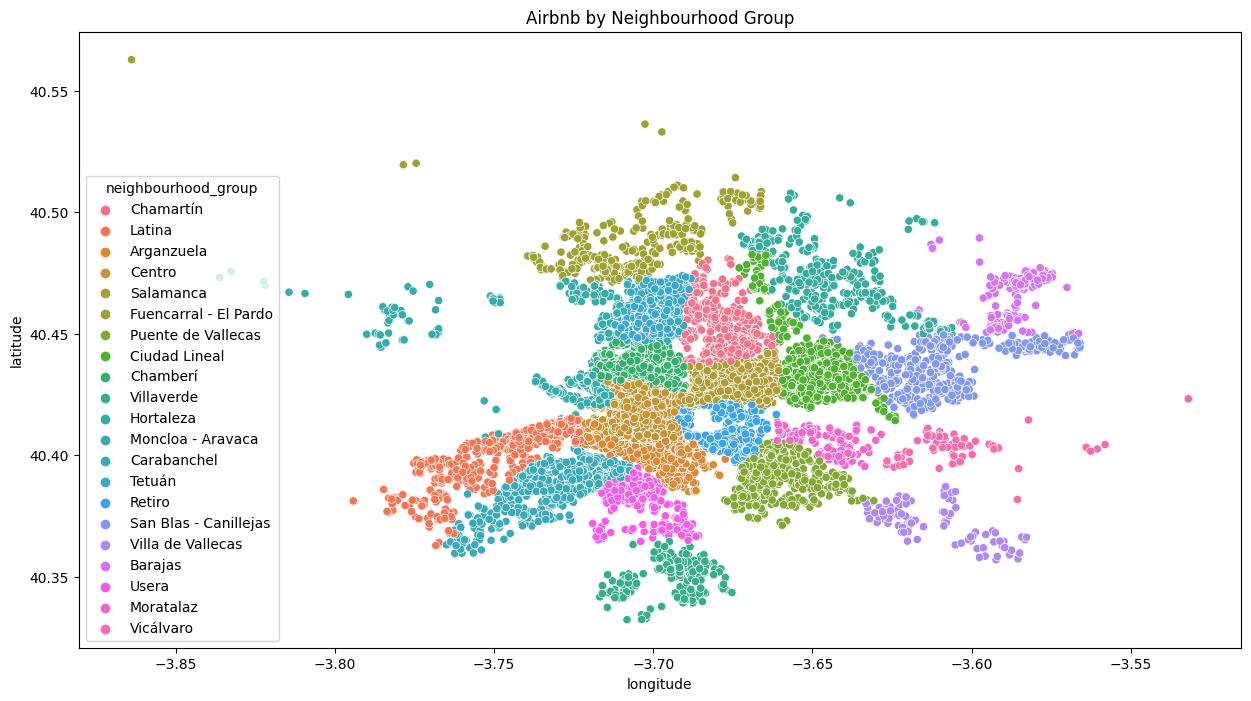

In [16]:
plt.figure(figsize = (15,8))
sns.scatterplot(madrid,
    x = 'longitude', 
    y = 'latitude',
    hue = 'neighbourhood_group'
               )
plt.title('Airbnb by Neighbourhood Group')



***Map by Roome type***

Text(0.5, 1.0, 'Map Airbnb by Room Type')

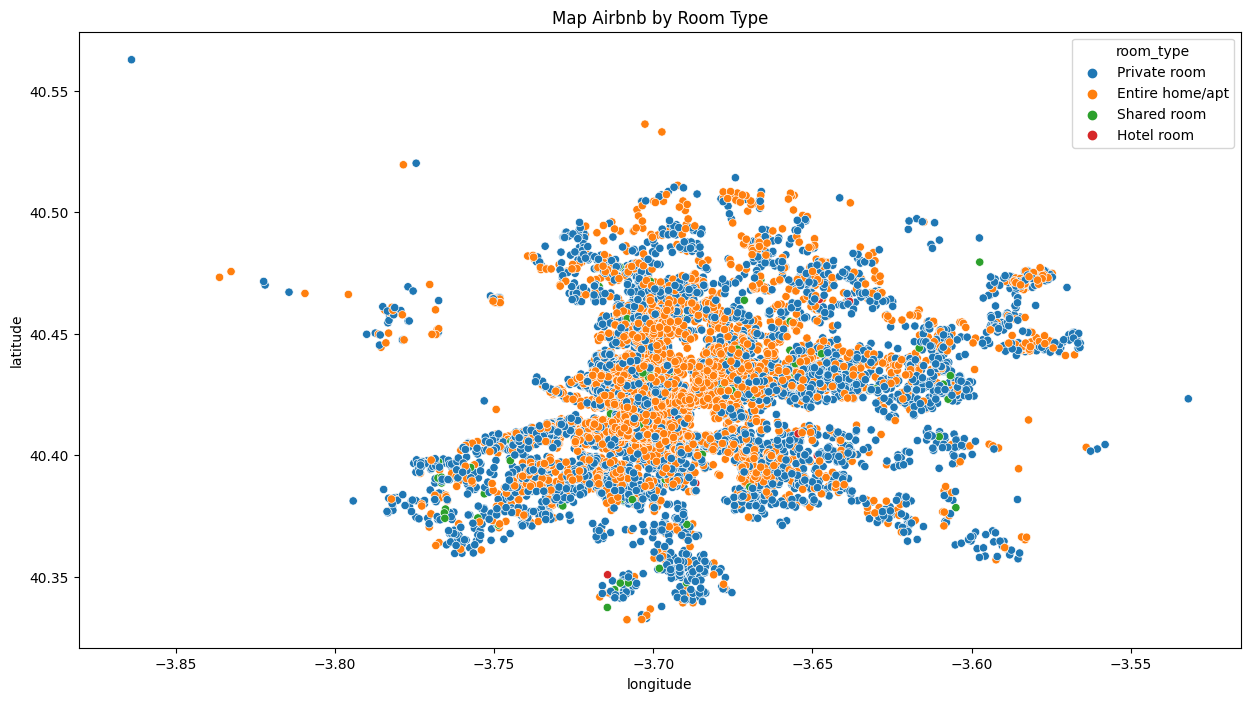

In [17]:
plt.figure(figsize = (15,8))
sns.scatterplot(madrid,
    x = 'longitude', 
    y = 'latitude',
    hue = 'room_type'
               )
plt.title('Map Airbnb by Room Type')

***Average Price by Room Type***

In [18]:
average = madrid.groupby(['room_type','neighbourhood_group'])['price'].mean().reset_index()
average

,room_type,neighbourhood_group,price
0,Entire home/apt,Arganzuela,221.954545
1,Entire home/apt,Barajas,122.365385
2,Entire home/apt,Carabanchel,145.796226
3,Entire home/apt,Centro,149.163934
4,Entire home/apt,Chamartín,125.557185
...,...,...,...
70,Shared room,Tetuán,47.500000
71,Shared room,Usera,71.750000
72,Shared room,Vicálvaro,200.000000
73,Shared room,Villa de Vallecas,100.000000


In [19]:
madrid.neighbourhood_group.nunique()


21

In [20]:
px.bar(average,
       x = 'neighbourhood_group',
       y = 'price',
       color = 'room_type',
       labels={'room_type': 'Room Type', 'price': 'Average Price', 'neighbourhood_group':'Neighbourhood Group'},
       title='Average Price by Room Type and Neighbourhood Group',
       facet_row = 'room_type',
       category_orders = {'price':'descending'},
       height = 1000,
       width = 1000
      )

In [21]:
fig = px.scatter(
    madrid,
    x='latitude',
    y='longitude',
    color='room_type',
    size='price',
    labels={'room_type': 'Room Type', 'price': 'Price'},
    title='Airbnb Map by Room Type and Price',
)

fig.show()

# Best Renter

*import dataset calendar*

In [22]:
calendar = pd.read_csv('/kaggle/input/madrid-airbnb-data/calendar.csv')
calendar = calendar[calendar['available'] == 'f']  # renting date
calendar

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,167183,2021-04-15,f,$45.00,$45.00,1.0,5.0
181,6369,2021-10-12,f,$60.00,$60.00,1.0,1125.0
182,6369,2021-10-13,f,$60.00,$60.00,1.0,1125.0
183,6369,2021-10-14,f,$60.00,$60.00,1.0,1125.0
184,6369,2021-10-15,f,$60.00,$60.00,1.0,1125.0
...,...,...,...,...,...,...,...
7161251,49103093,2022-04-10,f,$28.00,$35.00,1.0,1125.0
7161252,49103093,2022-04-11,f,$28.00,$35.00,1.0,1125.0
7161253,49103093,2022-04-12,f,$28.00,$35.00,1.0,1125.0
7161254,49103093,2022-04-13,f,$28.00,$35.00,1.0,1125.0


*calculate renting days*

In [23]:
top_renter = pd.DataFrame(calendar.groupby('listing_id')['date'].count().sort_values(ascending=False))
top_renter.head()

,date
listing_id,
18245617,367
35250805,367
32510952,367
13548493,367
34988657,367


In [24]:
top_renter.reset_index(inplace= True)
top_renter = top_renter.rename(columns={'listing_id':'id', 'date':'renting_days'})

In [25]:
madrid = pd.merge(madrid, top_renter,how='left', on='id')
madrid.head()

,id,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,renting_days
0,6369,13660,Chamartín,Hispanoamérica,40.45724,-3.67688,Private room,60,1,78,0.58,1,180,185.0
1,21853,83531,Latina,Cármenes,40.40381,-3.74130,Private room,31,4,33,0.42,2,364,1.0
2,23001,82175,Arganzuela,Legazpi,40.38840,-3.69511,Entire home/apt,50,15,0,0.00,7,1,NaN
3,24805,346366726,Centro,Universidad,40.42183,-3.70529,Entire home/apt,92,5,10,0.13,1,72,293.0
4,26825,114340,Arganzuela,Legazpi,40.38975,-3.69018,Private room,26,2,149,1.12,1,365,NaN


In [26]:
madrid['renting_days'].fillna(0, inplace=True)

**Best Renter by Neighbourhood Group **

In [27]:
best = madrid.groupby('neighbourhood_group')['renting_days'].mean().sort_values(ascending=False)
best

neighbourhood_group
Moratalaz                224.474576
Arganzuela               221.385870
Villaverde               212.028249
Barajas                  211.203488
Ciudad Lineal            202.534669
Moncloa - Aravaca        201.938628
Retiro                   199.876506
Latina                   199.651316
Salamanca                199.200151
Tetuán                   197.428922
Chamberí                 197.138978
Centro                   196.500752
Fuencarral - El Pardo    194.460317
Hortaleza                189.162088
Chamartín                187.643103
Usera                    185.503571
Carabanchel              182.711864
Villa de Vallecas        182.489796
San Blas - Canillejas    176.921529
Vicálvaro                169.027778
Puente de Vallecas       159.606159
Name: renting_days, dtype: float64

In [28]:
px.bar(best,
      color = best.index,
      range_y = (150,250),
     title = 'Average Renting days by Neghbourhood Group',
       labels = {'value':'Average Renting Days','neighbourhood_group':'Neighbourhood Group'},

      )

Top 3 renting area : 
1. Moratalaz with 224 days in average
2. Arganzuela with 221 days in average
3. Villaverde with 212 days in average


In [29]:
performance = madrid.groupby('neighbourhood_group')['availability_365'].mean().sort_values(ascending = True)

In [30]:
px.bar(performance,
      color = performance.index,
     title = 'Average Available days by Neghbourhood Group',
       labels = {'value':'Average Available Days','neighbourhood_group':'Neighbourhood Group'},
      )

**Price Range for Best Performance Neighbourhood Group**

In [71]:
mor_median_price = madrid[madrid['neighbourhood_group'] == 'Moratalaz']['price'].median()
mor_median_price

34.5

In [65]:
mor = madrid[madrid['neighbourhood_group'] == 'Moratalaz']
mor

,id,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,renting_days
309,847273,4424222,Moratalaz,Marroquina,40.40721,-3.64994,Entire home/apt,140,3,80,0.82,4,144,221.0
561,1737408,4424222,Moratalaz,Fontarrón,40.40564,-3.65427,Entire home/apt,105,3,73,0.99,4,146,219.0
948,3833696,19734284,Moratalaz,Fontarrón,40.40157,-3.64472,Private room,23,2,21,0.26,1,365,0.0
1208,5278933,4424222,Moratalaz,Fontarrón,40.40254,-3.64521,Entire home/apt,80,3,95,1.29,4,147,218.0
1234,5383331,18008880,Moratalaz,Marroquina,40.41229,-3.63613,Entire home/apt,50,1,0,0.00,1,0,365.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18443,47070986,380445505,Moratalaz,Fontarrón,40.40083,-3.63879,Private room,50,1,0,0.00,1,0,365.0
18547,47491813,52243178,Moratalaz,Media Legua,40.40918,-3.65322,Entire home/apt,40,300,0,0.00,3,364,1.0
18931,47959972,235311106,Moratalaz,Fontarrón,40.39945,-3.64169,Private room,20,1,0,0.00,1,181,184.0
19341,48696747,226969408,Moratalaz,Vinateros,40.40945,-3.64193,Private room,21,2,1,1.00,1,318,47.0


In [83]:
px.scatter(mor,
           x= 'longitude',
           y= 'latitude',
           color = 'price',
           trendline ='lowess'
)

**Renting Trend Over Time**

In [90]:
calendar['date'] = pd.to_datetime(calendar['date'], format='%Y-%m-%d')
calendar

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,167183,2021-04-15,f,$45.00,$45.00,1.0,5.0
1,6369,2021-04-15,t,$60.00,$60.00,1.0,1125.0
2,6369,2021-04-16,t,$60.00,$60.00,1.0,1125.0
3,6369,2021-04-17,t,$60.00,$60.00,1.0,1125.0
4,6369,2021-04-18,t,$60.00,$60.00,1.0,1125.0
...,...,...,...,...,...,...,...
7161251,49103093,2022-04-10,f,$28.00,$35.00,1.0,1125.0
7161252,49103093,2022-04-11,f,$28.00,$35.00,1.0,1125.0
7161253,49103093,2022-04-12,f,$28.00,$35.00,1.0,1125.0
7161254,49103093,2022-04-13,f,$28.00,$35.00,1.0,1125.0


In [89]:
calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7161256 entries, 0 to 7161255
Data columns (total 7 columns):
 #   Column          Dtype         
---  ------          -----         
 0   listing_id      int64         
 1   date            datetime64[ns]
 2   available       object        
 3   price           object        
 4   adjusted_price  object        
 5   minimum_nights  float64       
 6   maximum_nights  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 382.5+ MB


In [101]:
# calendar.set_index('date', inplace=True)
renting_days = calendar[calendar['available']=='f'].resample('M').size()
renting_days

date
2021-04-30    191248
2021-05-31    302439
2021-06-30    258699
2021-07-31    275705
2021-08-31    291511
2021-09-30    284911
2021-10-31    329327
2021-11-30    339004
2021-12-31    350414
2022-01-31    360580
2022-02-28    331988
2022-03-31    367840
2022-04-30    166414
Freq: M, dtype: int64

In [100]:
total_days = calendar['available'].resample('M').size()
total_days

date
2021-04-30    312606
2021-05-31    608127
2021-06-30    588510
2021-07-31    608127
2021-08-31    608127
2021-09-30    588510
2021-10-31    608127
2021-11-30    588510
2021-12-31    608127
2022-01-31    608127
2022-02-28    549276
2022-03-31    608127
2022-04-30    276955
Freq: M, Name: available, dtype: int64

In [102]:
percentage_renting_days = (renting_days / total_days) * 100
percentage_renting_days

date
2021-04-30    61.178608
2021-05-31    49.732868
2021-06-30    43.958301
2021-07-31    45.336747
2021-08-31    47.935875
2021-09-30    48.412261
2021-10-31    54.154313
2021-11-30    57.603779
2021-12-31    57.621845
2022-01-31    59.293536
2022-02-28    60.441017
2022-03-31    60.487365
2022-04-30    60.087018
Freq: M, dtype: float64

In [105]:
px.line(percentage_renting_days,
       labels= {'date':'Year-Month','value':'Renting Percentage','variable':'Renting %'}
       
       )

* The lowest percentage is in June 2021. During that month, there were fewer days when properties in Madrid were rented relative to the total number of available days.

# Regression Analysis

In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [32]:
madrid.columns

Index(['id', 'host_id', 'neighbourhood_group', 'neighbourhood', 'latitude',
       'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365', 'renting_days'],
      dtype='object')

In [33]:
madrid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19618 entries, 0 to 19617
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              19618 non-null  int64  
 1   host_id                         19618 non-null  int64  
 2   neighbourhood_group             19618 non-null  object 
 3   neighbourhood                   19618 non-null  object 
 4   latitude                        19618 non-null  float64
 5   longitude                       19618 non-null  float64
 6   room_type                       19618 non-null  object 
 7   price                           19618 non-null  int64  
 8   minimum_nights                  19618 non-null  int64  
 9   number_of_reviews               19618 non-null  int64  
 10  reviews_per_month               19618 non-null  float64
 11  calculated_host_listings_count  19618 non-null  int64  
 12  availability_365                

In [34]:
# choose only what we need for prediction
pre_madrid = madrid[['neighbourhood','neighbourhood_group','room_type','price','minimum_nights','calculated_host_listings_count','availability_365']]
pre_madrid.head(5)

,neighbourhood,neighbourhood_group,room_type,price,minimum_nights,calculated_host_listings_count,availability_365
0,Hispanoamérica,Chamartín,Private room,60,1,1,180
1,Cármenes,Latina,Private room,31,4,2,364
2,Legazpi,Arganzuela,Entire home/apt,50,15,7,1
3,Universidad,Centro,Entire home/apt,92,5,1,72
4,Legazpi,Arganzuela,Private room,26,2,1,365


*Change string into number in order to calculate correlation & prediction*

In [35]:
def encode(pre_madrid):
    for column in pre_madrid.columns[pre_madrid.columns.isin(['neighbourhood','neighbourhood_group', 'room_type'])]:
        codes, _ = pre_madrid[column].factorize()
        pre_madrid[column] = codes
    return pre_madrid

madrid_en = encode(pre_madrid.copy())
madrid_en

,neighbourhood,neighbourhood_group,room_type,price,minimum_nights,calculated_host_listings_count,availability_365
0,0,0,0,60,1,1,180
1,1,1,0,31,4,2,364
2,2,2,1,50,15,7,1
3,3,3,1,92,5,1,72
4,2,2,0,26,2,1,365
...,...,...,...,...,...,...,...
19613,5,3,0,23,30,8,349
19614,47,8,0,21,30,8,350
19615,24,8,0,22,7,8,364
19616,84,4,0,19,30,8,349


<Axes: >

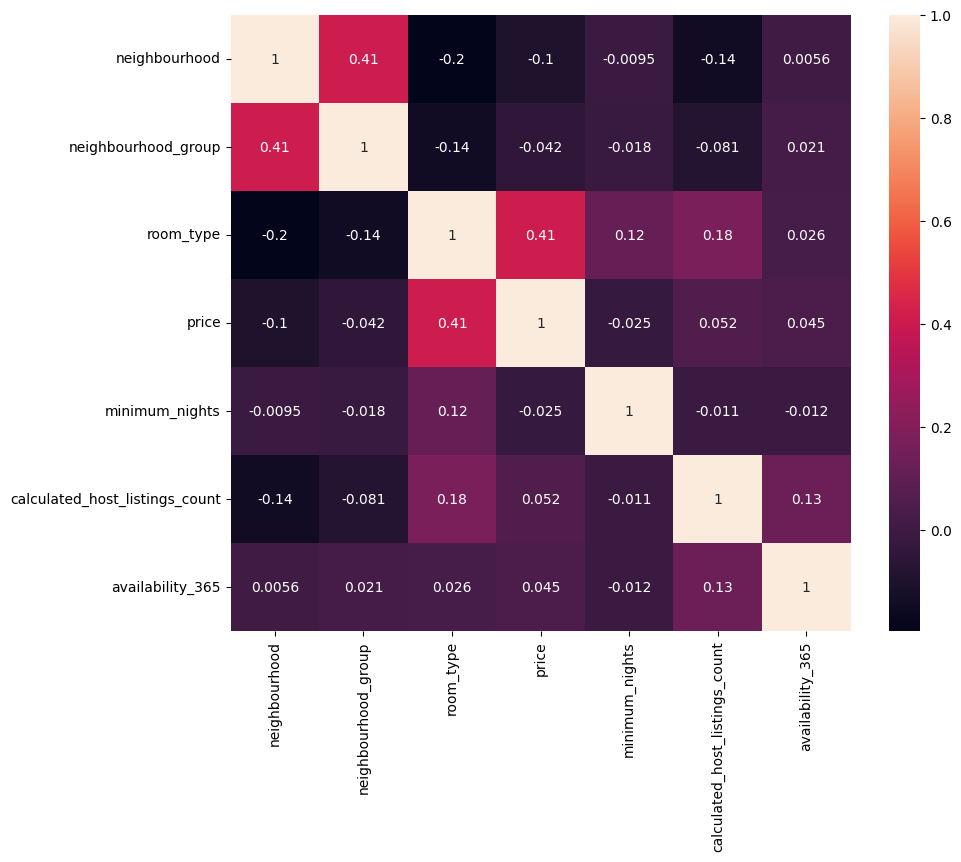

In [36]:
corr = madrid_en.corr(method='kendall')
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True)

* Room Type has a relative important positive influence on price

In [37]:
x = madrid_en.drop(columns = ['price'])
y = madrid_en['price']
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size =1, random_state = 353)

In [38]:
x_train.head()
y_train.head()

10277    206
12730     17
18090    202
12567     75
5657     100
Name: price, dtype: int64

In [39]:
reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [40]:
reg.intercept_
reg.coef_

array([ 5.65928569e-04,  2.52421022e+00,  7.80422750e+01,  2.71088352e-01,
       -3.69796663e-01, -5.41361211e-02])

In [41]:
reg_train_r2 = reg.score(x_train, y_train)
print(f'R2 score is : {reg_train_r2}')

R2 score is : 0.008348797552824472


*The R2 score of 0.0083 is close to 0, which indicates that the linear regression model has performed poorly on the training data.